In [2]:
import torch

In [3]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim


0

In [5]:
# se voglio stampare il numero contenuto all'interno del tensore uso .item()
scalar.item()

7

In [6]:
vector = torch.tensor([1,2])
vector

tensor([1, 2])

In [7]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
MATRIX = torch.tensor([[3,6],[4,8]])
MATRIX

tensor([[3, 6],
        [4, 8]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
TENSOR = torch.tensor([[[3,6,4], [2,1, 5], [7,5, 1]]])
TENSOR

tensor([[[3, 6, 4],
         [2, 1, 5],
         [7, 5, 1]]])

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

In [14]:
random_tensor = torch.rand(size=(3,4))
random_tensor, random_tensor.dtype

(tensor([[0.9709, 0.8748, 0.5235, 0.9615],
         [0.2024, 0.5304, 0.3087, 0.6922],
         [0.1745, 0.6419, 0.3957, 0.6842]]),
 torch.float32)

In [15]:
random_tensor_image_size = torch.rand(size=(224,224,3))
random_tensor_image_size.shape, random_tensor_image_size.ndim

(torch.Size([224, 224, 3]), 3)

In [16]:
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use torch.zeros_like(input) or torch.ones_like(input) which return a tensor filled with zeros or ones in the same shape as the input respectively.

In [17]:
zeros_to_tens = torch.zeros_like(zero_to_ten)
zeros_to_tens

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [19]:
some_tensor = torch.rand(3,4)
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device of tensor: {some_tensor.device}")

tensor([[0.5938, 0.0733, 0.0304, 0.3310],
        [0.0822, 0.8239, 0.3401, 0.3389],
        [0.2908, 0.3531, 0.6391, 0.0513]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device of tensor: cpu


## Operazioni tra tensori

In [20]:
tensor = torch.tensor([2,3,4])
tensor + 10

tensor([12, 13, 14])

In [21]:
tensor*10

tensor([20, 30, 40])

In [22]:
tensor

tensor([2, 3, 4])

In [23]:
tensor = tensor + 10
tensor

tensor([12, 13, 14])

In [24]:
tensor = torch.tensor([5,6,7])


The difference between element-wise multiplication and matrix multiplication is the addition of values.
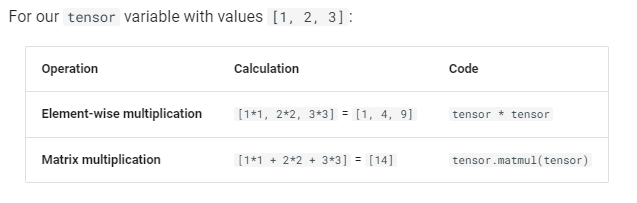

In [25]:
tensor * tensor

tensor([25, 36, 49])

In [26]:
torch.matmul(tensor, tensor)

tensor(110)

In [27]:
tensor @ tensor

tensor(110)

In [28]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

# torch.matmul(tensor_A, tensor_B) # (this will error)

Devo trasporre uno dei tensori per fare in modo che le dimensioni coincidano e potere in questo modo effettuare la moltiplicazione

In [29]:
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [30]:
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [31]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [32]:
# imposto il seed in modo da rendere la randomizzazione riproducibile
torch.manual_seed(42)
linear = torch.nn.Linear(in_features = 2,
                        out_features = 6)

x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


### Finding the min, max, mean, sum, etc (aggregation)
First we'll create a tensor and then find the max, min, mean and sum of it.


In [33]:
x = torch.arange(0,100,10)
x


tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [34]:
print(f'Minimum: {x.min()}')
print(f'Maximum: {x.max()}')
print(f'Mean: {torch.mean(x.type(torch.float32))}')

Minimum: 0
Maximum: 90
Mean: 45.0


In [35]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Reshaping, stacking, squeezing and unsqueezing¶


In [36]:
x = torch.arange(1.,8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [37]:
# Add an extra dimension
x_reshaped = x.reshape(1,7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [38]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.]])

In [39]:
# rimuovere una dimensione dal tensore
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [40]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([1., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[1., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])



You can also rearrange the order of axes values with torch.permute(input, dims), where the input gets turned into a view with new dims.

In [41]:
# Create tensor with specific shape
x_original = torch.rand(size=(224,224,3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [42]:
x_original[:1], x_permuted[:1]

(tensor([[[0.2666, 0.6274, 0.2696],
          [0.4414, 0.2969, 0.8317],
          [0.1053, 0.2695, 0.3588],
          [0.1994, 0.5472, 0.0062],
          [0.9516, 0.0753, 0.8860],
          [0.5832, 0.3376, 0.8090],
          [0.5779, 0.9040, 0.5547],
          [0.3423, 0.6343, 0.3644],
          [0.7104, 0.9464, 0.7890],
          [0.2814, 0.7886, 0.5895],
          [0.7539, 0.1952, 0.0050],
          [0.3068, 0.1165, 0.9103],
          [0.6440, 0.7071, 0.6581],
          [0.4913, 0.8913, 0.1447],
          [0.5315, 0.1587, 0.6542],
          [0.3278, 0.6532, 0.3958],
          [0.9147, 0.2036, 0.2018],
          [0.2018, 0.9497, 0.6666],
          [0.9811, 0.0874, 0.0041],
          [0.1088, 0.1637, 0.7025],
          [0.6790, 0.9155, 0.2418],
          [0.1591, 0.7653, 0.2979],
          [0.8035, 0.3813, 0.7860],
          [0.1115, 0.2477, 0.6524],
          [0.6057, 0.3725, 0.7980],
          [0.8399, 0.1374, 0.2331],
          [0.9578, 0.3313, 0.3227],
          [0.0162, 0.2137, 0

### Indexing (selecting data from tensors)¶


In [43]:
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).



In [44]:
print(f'Print first square bracket:\n{x[0]}')
print(f'Print second square bracket:\n{x[0][0]}')
print(f'Print third square bracket:\n{x[0][0][0]}')

Print first square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Print second square bracket:
tensor([1, 2, 3])
Print third square bracket:
1



You can also use : to specify "all values in this dimension" and then use a comma (,) to add another dimension.

In [45]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:,0]

tensor([[1, 2, 3]])

In [46]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [47]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [48]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [49]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### GPU

In [50]:
import torch
torch.cuda.is_available()

True

In [51]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [52]:
# Count number of devices
torch.cuda.device_count()

1

In [53]:
import torch
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


## Esercizi

In [54]:
# Create a random tensor with shape (7, 7).
X = torch.rand(7,7)
X, X.shape

(tensor([[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666],
         [0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695],
         [0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753, 0.8860],
         [0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
         [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886],
         [0.5895, 0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103],
         [0.6440, 0.7071, 0.6581, 0.4913, 0.8913, 0.1447, 0.5315]]),
 torch.Size([7, 7]))

Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [55]:
Y= torch.rand(1,7)
X, Y

(tensor([[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666],
         [0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695],
         [0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753, 0.8860],
         [0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
         [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886],
         [0.5895, 0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103],
         [0.6440, 0.7071, 0.6581, 0.4913, 0.8913, 0.1447, 0.5315]]),
 tensor([[0.1587, 0.6542, 0.3278, 0.6532, 0.3958, 0.9147, 0.2036]]))

In [56]:
X * Y.T

tensor([[0.1380, 0.0901, 0.1176, 0.0682, 0.1405, 0.0911, 0.0423],
        [0.4105, 0.1764, 0.2887, 0.1942, 0.5441, 0.0689, 0.1763],
        [0.1176, 0.0654, 0.1794, 0.0020, 0.3119, 0.0247, 0.2904],
        [0.3810, 0.2206, 0.5284, 0.3775, 0.5905, 0.3623, 0.2236],
        [0.2511, 0.1442, 0.2812, 0.3746, 0.3123, 0.1114, 0.3122],
        [0.5392, 0.6896, 0.1786, 0.0046, 0.2806, 0.1066, 0.8326],
        [0.1312, 0.1440, 0.1340, 0.1001, 0.1815, 0.0295, 0.1082]])

In [57]:
X * Y


tensor([[0.1380, 0.3714, 0.2429, 0.2805, 0.3505, 0.5249, 0.0543],
        [0.0996, 0.1764, 0.1447, 0.1940, 0.3292, 0.0963, 0.0549],
        [0.0570, 0.1304, 0.1794, 0.0040, 0.3767, 0.0688, 0.1804],
        [0.0926, 0.2209, 0.2652, 0.3775, 0.3578, 0.5073, 0.0697],
        [0.1007, 0.2384, 0.2329, 0.6182, 0.3123, 0.2574, 0.1606],
        [0.0936, 0.4932, 0.0640, 0.0033, 0.1214, 0.1066, 0.1854],
        [0.1022, 0.4626, 0.2157, 0.3209, 0.3528, 0.1324, 0.1082]])

In [58]:
# set the random seed to 0

seed = 0
torch.manual_seed(seed)

X = torch.rand(7,7)
X

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])

In [59]:
Y= torch.rand(1,7)
Y = Y.transpose(0,1)
Z = torch.matmul(X,Y)
Z


tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]])

In [60]:
A = torch.rand(2,3)
B = torch.rand(2,3)

In [61]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [62]:
A.to(device)
A.device

device(type='cpu')

In [63]:
device


'cuda'

In [64]:
A_cuda = A.to(device)

In [65]:
A_cuda.device, A.device

(device(type='cuda', index=0), device(type='cpu'))

In [66]:
tens7 = torch.rand(1,7)
tens7, tens7.max(), tens7.min()

(tensor([[0.8102, 0.9801, 0.1147, 0.3168, 0.6965, 0.9143, 0.9351]]),
 tensor(0.9801),
 tensor(0.1147))

In [67]:
tens7.argmax(), tens7.argmin()

(tensor(1), tensor(2))

**Esercizio 10**: Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [68]:
seed = 10
torch.manual_seed(seed)

r_tens = torch.rand(1,1,1,10)
r_tens

tensor([[[[0.4581, 0.4829, 0.3125, 0.6150, 0.2139, 0.4118, 0.6938, 0.9693,
           0.6178, 0.3304]]]])

In [69]:
new_tens = r_tens.squeeze()
new_tens, r_tens.shape, new_tens.shape

(tensor([0.4581, 0.4829, 0.3125, 0.6150, 0.2139, 0.4118, 0.6938, 0.9693, 0.6178,
         0.3304]),
 torch.Size([1, 1, 1, 10]),
 torch.Size([10]))